# Grib2 format example for wind data 

In [3]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client
from pylab import *

In [ ]:
# reading data from local file
data = ecdata.read("20220725000000-3h-oper-fc.grib2")

### Data reference date: 2022.07.25 00:00:00
### Forecast step: 3h (in future)
### oper : high-resolution forecast, atmospheric fields
### resolution : 0.4 degree (24')

In [4]:
# show all fields
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220725,0,3,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20220725,0,3,None,166,od,oper,fc,0001
2t,heightAboveGround,2,20220725,0,3,None,167,od,oper,fc,0001
d,isobaricInhPa,"50,200,...",20220725,0,3,None,155,od,oper,fc,0001
gh,isobaricInhPa,"50,200,...",20220725,0,3,None,156,od,oper,fc,0001
msl,meanSea,0,20220725,0,3,None,151,od,oper,fc,0001
q,isobaricInhPa,"50,200,...",20220725,0,3,None,133,od,oper,fc,0001
r,isobaricInhPa,"50,200,...",20220725,0,3,None,157,od,oper,fc,0001
ro,surface,0,20220725,0,3,None,205,od,oper,fc,0001
skt,surface,0,20220725,0,3,None,235,od,oper,fc,0001


In [7]:
#show u component of wind (m/s) -> eastern 
data.describe("u")

shortName,u
name,U component of wind
paramId,131
units,m s**-1
typeOfLevel,isobaricInhPa
level,"50,200,250,300,500,700,850,925,1000"
date,20220725
time,0
step,3
number,None
class,od


In [8]:
#show v component of wind (m/s) -> northern 
data.describe("v")

shortName,v
name,V component of wind
paramId,132
units,m s**-1
typeOfLevel,isobaricInhPa
level,"50,200,250,300,500,700,850,925,1000"
date,20220725
time,0
step,3
number,None
class,od


## 9 levels available: 50, 200, 250, 300, 500, 700, 850, 925, 1000 hPa (mbar)

In [15]:
#select wind components at a specific level
u_srfc = data.select(shortName = 'u',level=[1000])
v_srfc = data.select(shortName = 'v',level=[1000])
# u_srfc.values() returns all values for the entire grid
(len(u_srfc.values()), len(v_srfc.values()))

(405900, 405900)

In [28]:
# get latitudes and longitudes as numpy arrays (repeated array!)
lats = u_srfc.latitudes()
lons = u_srfc.longitudes()
(lats, lons)

(array([ 90.,  90.,  90., ..., -90., -90., -90.]),
 array([-180. , -179.6, -179.2, ...,  178.8,  179.2,  179.6]))

## Latitude: 
* ### north: +
* ### south: -

## Longitude:
* ### east: +
* ### west: -

In [29]:
#min and max latitude and longitude angles
lat_min = -90
lat_max = 90

lon_min = -180
lon_max = 180

# resolution is 0.4
reso = 0.4

# arrays without repetition
lat_values = arange(lat_min,lat_max+reso,reso)
lon_values = arange(lon_min,lon_max,reso)

In [34]:
grid =( int((lat_max - lat_min)/reso + 1), int((lon_max - lon_min)/reso))
grid

(451, 900)

In [60]:
#make matrices from grid values (easier to work with) -> wind[lat_index][lon_index]
u_srfc_values = reshape(u_srfc.values(),grid)
v_srfc_values = reshape(v_srfc.values(),grid)

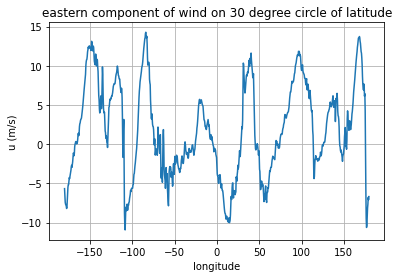

In [68]:
plot(lon_values, u_srfc_values[300,:])
plt.title("eastern component of wind on 30 degree circle of latitude");
plt.ylabel("u (m/s)");
plt.xlabel("longitude");
plt.grid()
#lat_values[300]

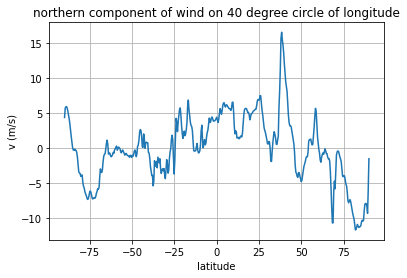

In [76]:
plot(lat_values, v_srfc_values[:,550])
plt.title("northern component of wind on 40 degree circle of longitude");
plt.ylabel("v (m/s)");
plt.xlabel("latitude");
plt.grid()
#lon_values[550]

## Visualization on a map

In [77]:
fig = GeoMap(area_name='europe')
fig.coastlines(resolution="medium")
fig.gridlines()

In [78]:
fig.arrows(u=u_srfc, v=v_srfc, wind_style="arrows", density=2, colour='black')

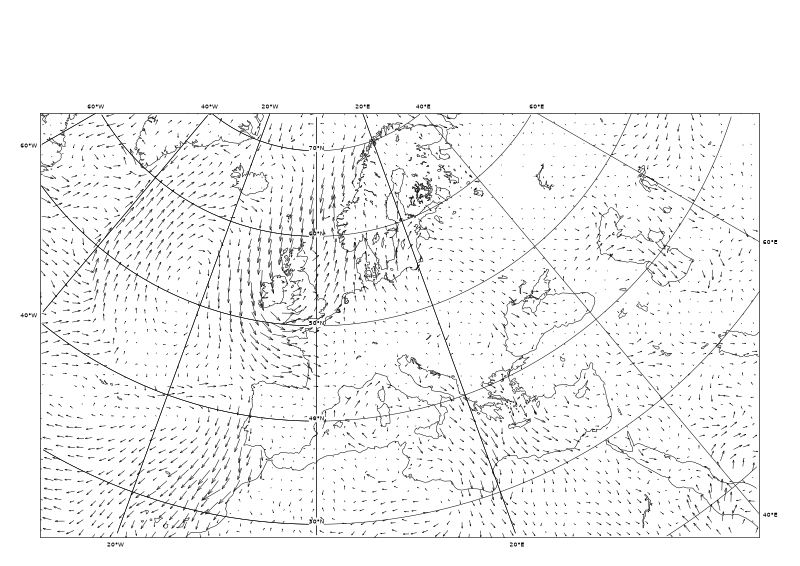

In [79]:
fig.show()

# TODO:
## 1. Reliable forecast?
## 2. Filter data to Romania
## 3. Interpolation?
## 4. Integrate with simulation